# ISEL - CPS 
## Semestre 2021/21
# <br>
###  <center> Trabalho Prático 1 </center>
# </br>


Trabalho realizado por:
* Fábio Dias, numero <b> 42921 </b>
* Jorge Silva, numero <b> 44615 </b>

 


A figura representa o esquema típico do processo de envio e recepção de informação usando modulações
digitais.

![fig_trab](esquemaCPS.png)

O 1º trabalho foca os blocos de amostragem, reconstrução do sinal e Quantificação e Desquantificação do sinal.




# Amostragem

1. Considere o sinal $x(t) = 20000 cos(2\pi 5025 t) + 10000 sin(2\pi 2507 t)$. Estude o sinal teoricamente. Apresente a expressão do espetro do sinal e represente numa figura o espectro de Amplitude e de Fase do sinal.


Após as transformações necessárias, o sinal fica $x(t) = 20000 cos(2\pi 5025 t) + 10000 cos(2\pi 2507 t - \pi/2)$

<h3><center>Espectro de Amplitudes</center></h3>

![EspectroAmplitudeOriginal](Imagens/EspectroAmplitudes.jpg)

<h3><center>Espectro de Fase</center></h3>

![EspectroFaseOriginal](Imagens/EspectroFase.jpg)

2. Gere o sinal $x(t)$ usando o Python. Cnsidere o intervalo de tempo $0 < t < 1\,ms$, e a frequência de amostragem de 48KHz. Apresente numa figura o sinal no domínio do tempo e noutra figura o seu espetro de amplitude.


Text(0.5, 1.0, 'Espectro de Amplitudes')

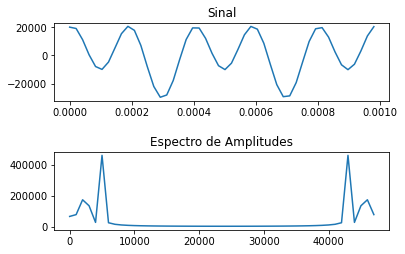

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 48000
Ts = 1 / Fs

t = np.arange(0, 0.001, Ts)
x = 20000 * np.cos(2 * np.pi * 5025 * t) + 10000 * np.sin(2 * np.pi * 2507 * t)

f = np.arange(0, Fs, Fs/len(x))

fig, axs = plt.subplots(2)
fig.tight_layout(pad=3.0)

axs[0].plot(t, x)
axs[0].set_title("Sinal")

y = np.fft.fft(x)

axs[1].plot(f, np.abs(y))
axs[1].set_title("Espectro de Amplitudes")

3. Admitindo que faz a amostragem do sinal com uma frequência $f_s = 8kHz$, represente o espectro do sinal amostrado. Comente os resultados apresentados.

<b>Resposta:</b> O sinal amostrado apresenta intercepções com as frequências das réplicas.
Isto porque a <b>Frequência de Amostragem</b> é demasiado baixa.

De forma a evitar isto, a <b>Frequência de Amostragem</b> deve ser maior que duas vezes a frequência máxima do sinal. $f_s > 2frequenciaMaxima$

<h3><center>Espectro de Amplitudes com Réplicas</center></h3>

![EspectroAmplitudesAmostrado](Imagens/EspectroAmplitudesComReplicas.jpg)

# Quantificação

4. Construa uma função em Python que crie as tabelas com os intervalos de decisão e valores de quantificação para um quantificador uniforme. 

    Esta função tem como parâmetros de entrada o número de bits por amostra (R), o valor máximo a quantificar (Vmax) e o tipo de quantificador (midrse ou midtread). Como parâmetros de saída tem dois Numpy arrays com valores de quantificação e os intervalos de decisão.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def Quantific(R,Vmax,Qtype):
    
    if Qtype != "midrise" and Qtype != "midtread":

        print("Tipo de Quantificador inserido não válido")

        return
    
    delta = (2*Vmax) / 2**R
    
    if Qtype == "midrise":
        
        Iq = np.arange(-Vmax + delta, Vmax + delta, delta)

        Vq = np.arange(-Vmax + (delta/2), Vmax + (delta/2), delta)
    
    else:
        
        Iq = np.arange(-Vmax + (delta/2), Vmax, delta)
        
        Vq = np.arange(-Vmax + delta, Vmax + delta, delta)

    return Vq, Iq

   Verifique se a sua implementação está correta.
   Admita que $R=3$ e $Vmax=1$, para uma quantificação midtread.

In [4]:
Vq, Iq = Quantific(3,1,'midtread')

print(Vq)
print(Iq)

[-0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.  ]
[-0.875 -0.625 -0.375 -0.125  0.125  0.375  0.625  0.875]


Implemente uma função que realize a quantificação:

In [5]:
# Função que implementa o Quantificador
# in: 
# x - sinal com amostras (nao quantificadas)
# Vq, Iq - valores de quantificação e intervalos de decisão
# out: 
# xq - sinal quantificado
# iq - indices do sinal quantificado
# prototipo da função
# xq, iq = Quantificador(x, Vq, Iq)
def Quantificador(Rx, Vq, Iq):
    
    xq = np.zeros(len(Rx))
    iq = np.zeros(len(Rx), dtype="int")

    indexQuantificado = 0
    
    for valorDoSinal in Rx:
    
        indexIntervalos = 0
        
        for intervaloDecisao in Iq:

            if valorDoSinal <= intervaloDecisao:
                xq[indexQuantificado] = Vq[indexIntervalos]
                iq[indexQuantificado] = indexIntervalos
                indexQuantificado += 1
                break
                
            if indexIntervalos >= len(Iq) - 1:
                xq[indexQuantificado] = Vq[indexIntervalos]
                iq[indexQuantificado] = indexIntervalos
                indexQuantificado += 1
                break
            
            indexIntervalos += 1
                
    return xq, iq

In [6]:
# testes unitarios
quantificador = Quantific(2, 1, "midrise")
sinal = [0.1, 0.8, -0.3, -0.9, 1.1]
sinalQuantificado = Quantificador(sinal, quantificador[0], quantificador[1])

print("Valores de Quantificação: ", quantificador[0])
print("Intervalos de Decisão: ", quantificador[1])
print("Valor do Sinal: ", sinal)
print("Sinal Quantificado: ", sinalQuantificado[0])
print("Indices de Quantificação: ", sinalQuantificado[1])

Valores de Quantificação:  [-0.75 -0.25  0.25  0.75]
Intervalos de Decisão:  [-0.5  0.   0.5  1. ]
Valor do Sinal:  [0.1, 0.8, -0.3, -0.9, 1.1]
Sinal Quantificado:  [ 0.25  0.75 -0.25 -0.75  0.75]
Indices de Quantificação:  [2 3 1 0 3]


Construa um sinal de rampa $x(t)= 1000t\Pi\left(\frac{t-0.5\times10^{-3}}{10^{-3}}\right)$, no intervalo $0<t<1\,ms$.
Represente o sinal x(t), o sinal quantificado e o sinal de erro.

Text(0.5, 1.0, 'Erro')

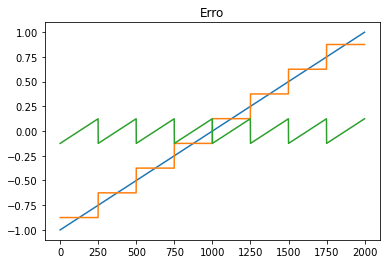

In [7]:
#t = np.arange(0, .001, 0.0001)
#x = 1000 * t * np.pi*((t - (0.5*pow(10, -3))/pow(10, -3)))

x = np.arange(-1, 1, 0.001)

Vmax = np.max(np.abs(x))

Vq, Iq = Quantific(3, Vmax, "midrise")
xq = Quantificador(x, Vq, Iq)[0]
erro = x - xq

plt.plot(x)
plt.title("Sinal")

plt.plot(xq)
plt.title("Sinal Quantizado")

plt.plot(erro)
plt.title("Erro")

Represente o histograma do sinal de erro. Comente os resultados.

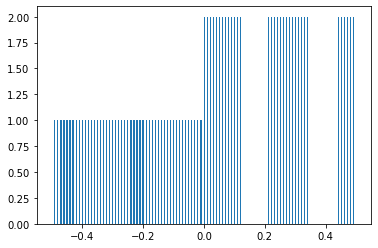

In [30]:
def Histograma(sinalOriginal, sinalQuantizado, numeroDeAmostras):
    sinalDeErro = sinalOriginal - sinalQuantizado

    plt.hist(sinalDeErro, bins=numeroDeAmostras)
    
x = np.arange(-1, 1, 0.01)

Vq, Iq = Quantific(3,4,"midrise")
xq = Quantificador(x, Vq, Iq)[0]

Histograma(x, xq, 500)

5. Implemente uma função que realize a desquantificação:

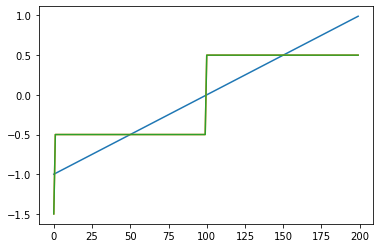

In [9]:
#Recebo Valores de Quantificacao (VQ), Indices do Sinal Quantificado (iq) e retorno o sinal quantificado (xq)
def Desquantificador(Vq, iq):
    xq = np.zeros(len(iq))
    
    for valor in range(len(iq)):
        xq[valor] = Vq[iq[valor]]
        
    return xq

x = np.arange(-1, 1, 0.01)

Vq, Iq = Quantific(3, 4, "midrise")

xq, iq = Quantificador(x, Vq, Iq)

yq = Desquantificador(Vq, iq)

plt.plot(x)
plt.plot(xq)
plt.plot(yq)

Crie uma função que meça o SNR prático, ou seja, medindo a potência do sinal e a potência do sinal de erro.

In [10]:
def Measure_SNRp(x,y):
    
    erro = x - y
    
    potenciaSinal = np.sum(x**2.0)/len(x)
    potenciaErro = np.sum(erro**2.0)/len(erro)
    
    SNRp = 10*np.log10(potenciaSinal / potenciaErro)
    
    # resposta
    return SNRp

x = np.arange(-1, 1, 0.01)

Vmax = np.max(np.abs(x))

Vq, Iq = Quantific(3, Vmax, "midrise")

xq, iq = Quantificador(x, Vq, Iq)

snrP = Measure_SNRp(x, xq)

print(snrP)

18.04814164678492


Crie uma função que calcule o SNR para o caso da quantificação uniforme.

$SNRt_{dB}= 6,02 \times N_b + 10 \log_{10} \frac{3 P_x}{V_{max}}$

In [11]:
def Measure_SNRt(R,Vmax,P):
    
    SNRt = 6.02*R + 10*np.log10((3*P)/Vmax**2.0)
    
    #resposta
    return SNRt

x = np.arange(-1, 1, 0.01)
potenciaSinal = np.sum(x**2.0)/len(x)

Vmax = np.max(np.abs(x))

Measure_SNRt(3, Vmax, potenciaSinal)

18.06021714181246

Considere o sinal de rampa já implementado.
Realize a quantificação do sinal x(t) para cada valor de R={3,4,5,6,7,8}.
Meça a SNR prática e o valor teórico. 
Construa um gráfico com ambos os valores da SNR teórica e medida em função do número de bits R. Comente os resultados.

[18.04814165 24.06874156 30.08934147 36.10994139 42.1305413  48.15114121]
[18.06021714 24.08021714 30.10021714 36.12021714 42.14021714 48.16021714]


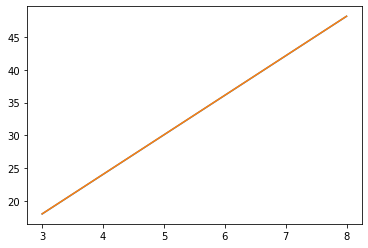

In [12]:
x = np.arange(-1, 1, 0.01)
Vmax = np.max(np.abs(x))
potenciaSinal = np.sum(x**2.0)/len(x)

Rs = np.array([3, 4, 5, 6, 7, 8], dtype="int")
snrP = np.zeros(6)
snrT = np.zeros(6)

for R in Rs:
    Vq, Iq = Quantific(R, Vmax, "midrise")

    xq, iq = Quantificador(x, Vq, Iq)
    
    snrP[R - 3] = Measure_SNRp(x, xq)
    snrT[R - 3] = Measure_SNRt(R, Vmax, potenciaSinal)

print(snrP)
print(snrT)
    
plt.plot(Rs, snrP)
plt.plot(Rs, snrT)

<b>Resposta: </b> A definição do SNR, <i>Signal To Noise Ration</i>, é quantas o sinal se sobrepoem ao ruído existente no mundo. Mas, neste caso, comparamos o sinal original ao sinal quantificado e o ruído é o erro de quantificação.

Pelo gráfico apresentado acima, podemos concluir que, neste caso, tanto o SNR prático como o teórico são iguais.
O que também podemos analisar é o número de vezes que o sinal se sobrepoem ao ruído à medida que o número de bits usado na quantificação é aumentado. Com apenas 3 bits, o sinal é pouco mais de 18 vezes mais presente que o ruído, enquanto com 8 bits, o sinal alcança 48 vezes mais que o ruído.

Grave um sinal de voz através do microfone com aproximadamente um segundo de duração. Faça a leitura do ficheiro de aúdio previamente gravado para um Numpy array. Apresente o sinal em função do tempo.

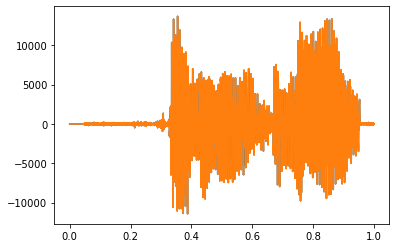

In [13]:
from scipy.io import wavfile as wave

samplingRate, audio = wave.read("Audios/AudioDeUmMinuto.wav")

time = np.arange(0, 1, 1/samplingRate)

plt.plot(time, audio)

Realize a quantificação do sinal de voz para cada valor de R={3,4,5,6,7,8}. Meça a SNR prática e o valor teórico (para determinar a potência no caso teórico deve usar o mesmo valor que na prática). Construa um gráfico com ambos os valores da SNR teórica e SNR medida em função do número de bits R. Comente os resultados.

SNR Prático dos R's Pedidos:  [ 6.85005146 13.0498136  19.42233696 25.92133859 32.54710682 38.73646485]
SNR Teórico dos R's Pedidos:  [ 9.02509537 15.04509537 21.06509537 27.08509537 33.10509537 39.12509537]



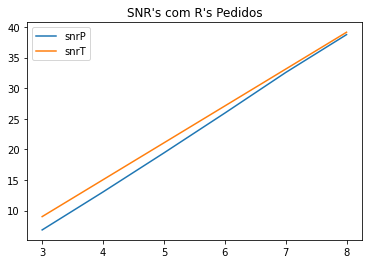

In [14]:
x = wave.read("Audios/AudioDeUmMinuto.wav")[1][:,0]
Vmax = np.max(np.abs(x))
potenciaSinal = np.sum(x**2.0)/len(x)

RsPedidos = np.array([3, 4, 5, 6, 7, 8], dtype="int")

snrPRsPedidos = np.zeros(len(RsPedidos))
snrTRsPedidos = np.zeros(len(RsPedidos))

for R in RsPedidos:
    Vq, Iq = Quantific(R, Vmax, "midrise")

    xq, iq = Quantificador(x, Vq, Iq)
    
    snrPRsPedidos[R - 3] = Measure_SNRp(x, xq)
    snrTRsPedidos[R - 3] = Measure_SNRt(R, Vmax, potenciaSinal)

print("SNR Prático dos R's Pedidos: ", snrPRsPedidos)
print("SNR Teórico dos R's Pedidos: ", snrTRsPedidos)
print()

plt.title("SNR's com R's Pedidos")
plt.plot(RsPedidos, snrPRsPedidos)
plt.plot(RsPedidos, snrTRsPedidos)
plt.legend(["snrP", "snrT"])
plt.show()

<b>Resposta: </b> Como previamente explicado o que é o SNR, neste caso, o SNR teórico apresenta melhores resultados que o SNR prático. Mas, como é possível observar, o SNR prático irá ultrapassar a qualidade do teórico usando mais bits.
Não compensa o uso desses bits pois entre os cinco e os seis bits já observamos valores decentes, podendo assim poupar o tamanho da mensagem futura.

Faça a leitura do ficheiro de imagem. Teste o código a baixo com vários valores de Q. Descreva o que produz o
código.

In [15]:
from PIL import Image
Q = 5
im = Image.open("lena.tiff")
type(im)
im = im.quantize(Q)
im.show()

<b>Resposta:</b> Alterando os valores de Q, obtemos uma melhor ou pior qualidade de imagem. Quanto mais alto, melhor fica e, consequentemente, quanto menor, pior.
Acredito que este valor é o número de cores que queremos que a imagem quantizada possua. Quantas mais cores, neste caso são as variações do cinzento, mais qualidade possui.